In [22]:
pip install git+https://github.com/r-trimbour/atacnet --force-reinstall --no-deps

  Cloning https://github.com/r-trimbour/atacnet to /tmp/pip-req-build-hst0zann
  Running command git clone --filter=blob:none --quiet https://github.com/r-trimbour/atacnet /tmp/pip-req-build-hst0zann
  Resolved https://github.com/r-trimbour/atacnet to commit 908ccfb6df42643d9c9320e70c66a8eb318c2963
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for atacnet: filename=atacnet-0.1.6-cp310-cp310-manylinux_2_35_x86_64.whl size=135872 sha256=aa8dae572489a03f00b4565f913a59188a5536ccfcdbb7feb4c542f9eb16c43b
  Stored in directory: /tmp/pip-ephem-wheel-cache-959d0qi_/wheels/83/71/03/27ac877585c7522cc9703181a3a6f924b2df33bea3bd640cea
Successfully built atacnet
  Attempting uninstall: atacnet
    Found existing installation: atacnet 0.1.6
    Uninstalling atacnet-0.1.6:
      Successfully uninstalled atacnet-0.1.6
Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install "../../../atacnet/"

Processing /home/rtrimbou/ATACNet/atacnet
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for atacnet: filename=atacnet-0.1.6-cp310-cp310-manylinux_2_35_x86_64.whl size=237917 sha256=2a9829f65a5e086f3778a8900a6ecccf2b8d36dba50b2fbbe958323e2312c78c
  Stored in directory: /tmp/pip-ephem-wheel-cache-a73udhyh/wheels/00/f4/bb/b1e7aa54ec6f138ef0b5c7db3d0adeba72c18ca844efc143dc
Successfully built atacnet
  Attempting uninstall: atacnet
    Found existing installation: atacnet 0.1.6
    Uninstalling atacnet-0.1.6:
      Successfully uninstalled atacnet-0.1.6
Note: you may need to restart the kernel to use updated packages.


In [15]:
import warnings
import tqdm
warnings.filterwarnings("ignore", category=FutureWarning, message=r".*Reordering categories will always return a new Categorical object.*")
warnings.filterwarnings("ignore", category=FutureWarning, message=r".*is_categorical_dtype is deprecated and will be removed in a future version.*")

In [16]:
import atacnet as an
import anndata as ad
import scipy as sp
import pandas as pd
import numpy as np
import tqdm
from functools import reduce
import scanpy as sc

In [17]:
cicero = pd.read_csv('cicero/cicero_results.csv', sep=' ',)
cicero.columns = ['Peak1', 'Peak2', 'cicero_score']

In [18]:
(cicero.Peak1.str.split('-', expand=True)[1].values.astype(int) - cicero.Peak2.str.split('-', expand=True)[1].values.astype(int)).max()

495464

In [19]:
cicero.set_index(['Peak1', 'Peak2'], inplace=True)
cicero = cicero[cicero['cicero_score']!=0]

In [20]:
cicero

,,cicero_score
Peak1,Peak2,
chr1-155091163-155092068,chr1-155255025-155255938,0.872333
chr1-89005340-89006013,chr1-89035072-89035816,0.858115
chr1-89035072-89035816,chr1-89036874-89037764,0.830436
chr1-87042067-87042989,chr1-87044546-87045351,0.828934
chr1-88998488-88999355,chr1-89035072-89035816,0.802428
...,...,...
chr1-51284635-51285476,chr1-51696880-51697742,-0.653234
chr1-43649701-43650547,chr1-43974428-43975318,-0.662702
chr1-8499656-8500521,chr1-8507009-8507895,-0.671305


In [21]:
atacnet = pd.read_csv('circe_networks/circe_networks_results.csv', sep='\t')
atacnet["peak1"] = atacnet["peak1"].str.replace('_', '-')
atacnet["peak2"] = atacnet["peak2"].str.replace('_', '-')
atacnet

,peak1,peak2,score
0,chr1-155091163-155092068,chr1-155255025-155255938,0.873288
1,chr1-89005340-89006013,chr1-89035072-89035816,0.858825
2,chr1-89035072-89035816,chr1-89036874-89037764,0.831132
3,chr1-87042067-87042989,chr1-87044546-87045351,0.829582
4,chr1-88998488-88999355,chr1-89035072-89035816,0.803898
...,...,...,...
134564,chr1-51284635-51285476,chr1-51696880-51697742,-0.654128
134565,chr1-43649701-43650547,chr1-43974428-43975318,-0.663685
134566,chr1-15016142-15016992,chr1-15430879-15431776,-0.672063
134567,chr1-8499656-8500521,chr1-8507009-8507895,-0.672213


In [22]:
atacnet = atacnet[atacnet['peak1'].str.split('-', expand=True)[1].values < atacnet['peak2'].str.split('-', expand=True)[1].values]
atacnet.columns = ['Peak1', 'Peak2', 'circe_score']

In [23]:
atacnet.set_index(['Peak1', 'Peak2'], inplace=True)

In [24]:
res = pd.concat([atacnet, cicero], axis=1)

In [25]:
res.corr(method='spearman')

,circe_score,cicero_score
circe_score,1.000000,0.999632
cicero_score,0.999632,1.000000


In [26]:
res.corr(method='pearson')

,circe_score,cicero_score
circe_score,1.0000,0.9999
cicero_score,0.9999,1.0000


In [30]:
res[res['cicero_score'].isna()]['circe_score'].abs().max()

0.7840922911354921

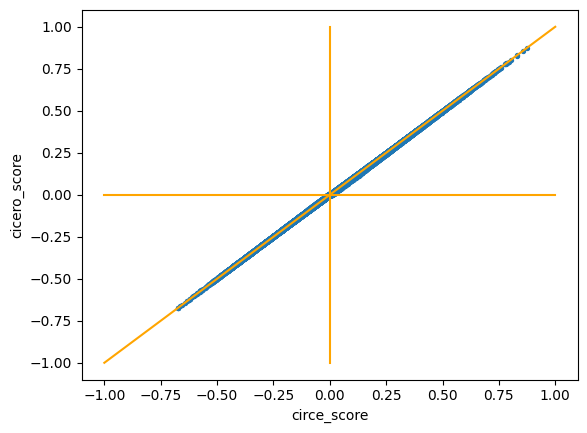

In [31]:
import matplotlib.pyplot as plt
res.plot.scatter('circe_score', 'cicero_score', s=8)
plt.plot([-1,1],[-1,1], color='orange')
plt.plot([0,0],[-1,1], color='orange')
plt.plot([-1,1], [0,0], color='orange')


### Time benchmark

In [32]:
cicero_bench = pd.read_csv("cicero_time.txt", sep='\t')
cicero_bench

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
0,1523.3382,0:25:23,1451.94,3382.32,1445.52,1447.15,0.07,0.0,98.39,1498.94


In [33]:
atacnet_bench = pd.read_csv("atacnet_time.txt", sep='\t')
atacnet_bench

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
0,14.5236,0:00:14,325.46,696.88,320.34,321.4,208.13,8.82,90.46,13.4


In [34]:
bench = pd.concat([atacnet_bench, cicero_bench])
bench.index=['circe', 'cicero']

In [35]:
import seaborn as sb

Text(0, 0.5, 'logscale')

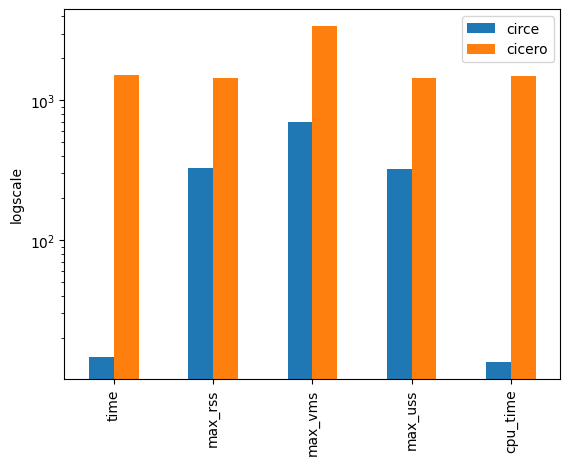

In [36]:
df = bench.transpose()
df = df.loc[["s", "max_rss", "max_vms", "max_uss", "cpu_time"], :]
df.index = ["time", "max_rss", "max_vms", "max_uss", "cpu_time"]

fig, ax = plt.subplots(1)
df.plot.bar(ax=ax)
ax.set_yscale('log')
ax.set_ylabel("logscale")

In [38]:
df['cicero']/df['circe']

time        104.887094
max_rss       4.461193
max_vms       4.853519
max_uss       4.512456
cpu_time    111.861194
dtype: object

In [21]:
A = res['cicero_score'].unstack()

In [22]:
new_indexes = pd.Series(A.index, index=A.index).str.split('-', expand=True)
new_indexes.columns = ['chr', 'start', 'end']
new_indexes['start'] = new_indexes['start'].astype(int)
new_indexes['end'] = new_indexes['end'].astype(int)

B = pd.concat([A, new_indexes], axis=1)
C = pd.concat([B, new_indexes.transpose()], axis=0)

In [23]:
C = C.sort_values(['chr', 'start', 'end']).transpose().sort_values(['chr', 'start', 'end'])

In [24]:
A = res['atacnet_score'].unstack()

In [25]:
new_indexes = pd.Series(A.index, index=A.index).str.split('-', expand=True)
new_indexes.columns = ['chr', 'start', 'end']
new_indexes['start'] = new_indexes['start'].astype(int)
new_indexes['end'] = new_indexes['end'].astype(int)

B = pd.concat([A, new_indexes], axis=1)
D = pd.concat([B, new_indexes.transpose()], axis=0)

In [26]:
D = D.sort_values(['chr', 'start', 'end']).transpose().sort_values(['chr', 'start', 'end'])

In [27]:
import seaborn as sb

<Axes: >

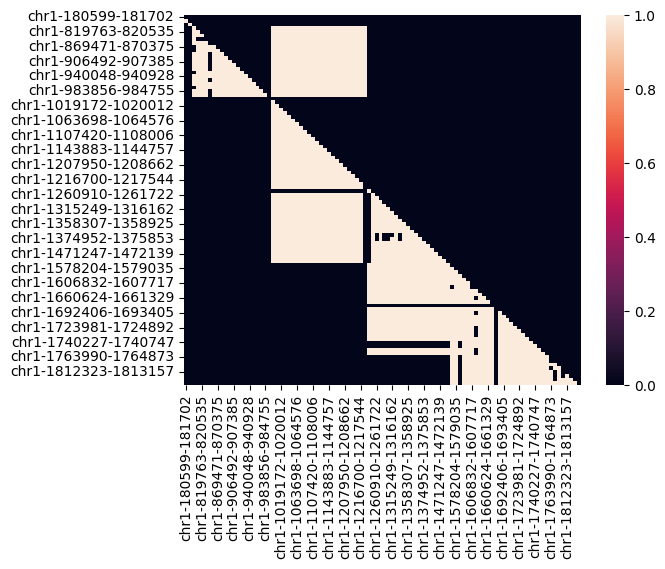

In [28]:
sb.heatmap(np.abs(C.fillna(0).iloc[:100,:100].astype(np.float64)).astype(bool))

<Axes: >

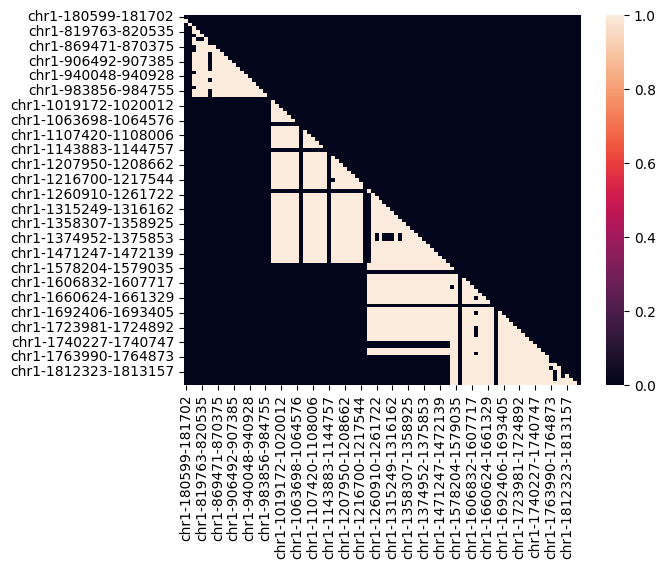

In [29]:
sb.heatmap(np.abs(D.fillna(0).iloc[:100,:100].astype(np.float64)).astype(bool))

In [18]:
atac = sc.read_csv("cicero/cicero_cds.tsv", delimiter=" ").T

In [19]:
atac = an.add_region_infos(atac, sep=('-', '-'), inplace=False)

In [20]:
an.compute_atac_network(atac)

Output()

Output()

Alpha coefficient calculated : 0.20593540326985205
Starting to process chromosomes : ['chr1']


Output()

Finishing to process chromosomes : ['chr1']


464232 464232
Averaging co-accessibility scores across windows...
464232 464232
933717
394279
[ 1.          1.         -0.21535447 ...  2.          2.
  2.        ]
[ 1.          1.         -0.21535447 ...  1.          1.
  1.        ]
Done !


/home/rtrimbou/miniconda3/envs/hummuspy/lib/python3.10/site-packages/atacnet/atacnet.py:231: ImplicitModificationWarning: Setting element `.varp['atac_network']` of view, initializing view as actual.
  anndata.varp[key] = sliding_graphical_lasso(


In [16]:
atac = an.atacnet.subset_region(atac, "chr1", 10000, 1000000)

In [17]:
atacnet = an.extract_atac_links(atac)

/home/rtrimbou/miniconda3/envs/hummuspy/lib/python3.10/site-packages/atacnet/atacnet.py:291: ImplicitModificationWarning: Setting element `.varp['atac_network']` of view, initializing view as actual.
  anndata.varp[key] = anndata.varp[key].tocoo()


from to  value
   A  B     10
   A  C      5
   A  D     15
   B  D      8
   C  D      6


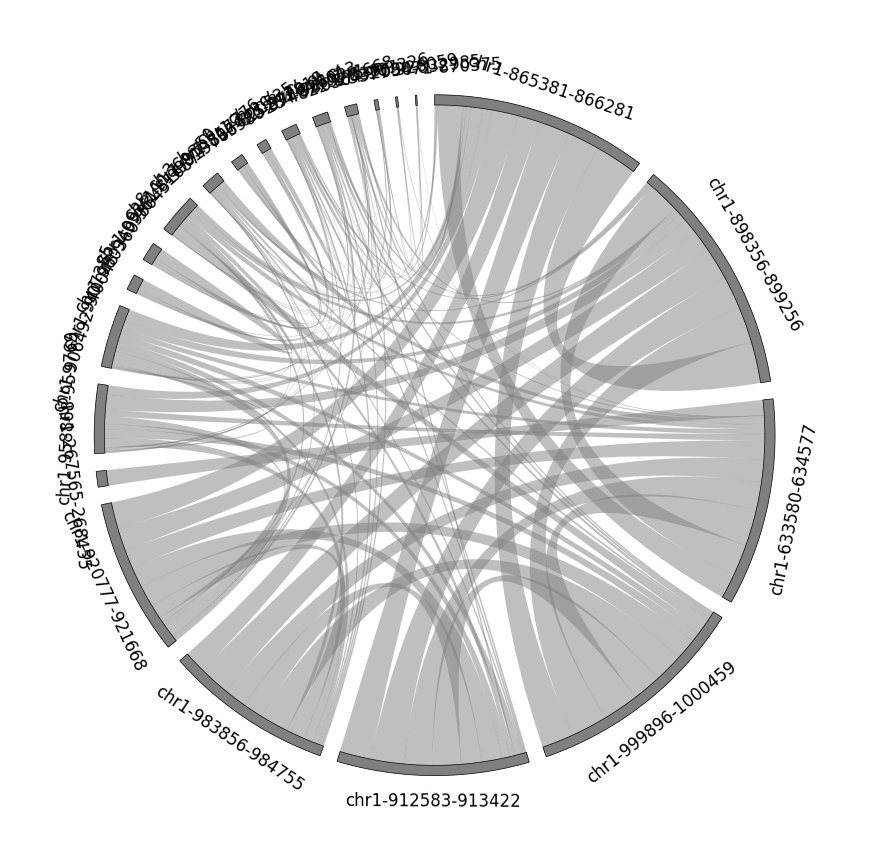

In [18]:
from pycirclize import Circos
from pycirclize.parser import Matrix
import pandas as pd

# Create from-to table dataframe & convert to matrix
fromto_table_df = pd.DataFrame(
    [
        ["A", "B", 10],
        ["A", "C", 5],
        ["A", "D", 15],
        ["B", "D", 8],
        ["C", "D", 6],
    ],
    columns=["from", "to", "value"], # Column name is optional
)
matrix = Matrix.parse_fromto_table(atacnet)

circos = Circos.initialize_from_matrix(
    matrix,
    space=3,
    cmap=dict(A="royalblue", B="orange", C="green", D="red"),
    label_kws=dict(size=12),
)

print(fromto_table_df.to_string(index=False))
fig = circos.plotfig()

In [37]:
isinstance(atac.varp["atac_network"], sp.sparse.csr_matrix)
atac.varp["atac_network"] = atac.varp["atac_network"].tocoo()

In [39]:
atac.varp["atac_network"] = atac.varp["atac_network"].tocsr()

In [40]:
atac.varp["atac_network"]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 402 stored elements and shape (40, 40)>

In [19]:
pip install pygenomeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.0 MB/s eta 0:00:006.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [60]:
from pygenomeviz.exception import (
    FeatureTrackNotFoundError,
    LinkRangeError,
    LinkTrackNotFoundError,
)
from pygenomeviz.track import FeatureSubTrack, FeatureTrack, LinkTrack, Track
from pygenomeviz.typing import TrackAlignType
from pygenomeviz.utils.helper import interpolate_color, size_label_formatter
from pygenomeviz.viewer import setup_viewer_html

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.colorbar import Colorbar
from matplotlib.colors import LinearSegmentedColormap, Normalize, to_hex
from matplotlib.figure import Figure
from matplotlib.font_manager import FontProperties
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from pygenomeviz import GenomeViz

gv = GenomeViz()
gv.set_scale_xticks(ymargin=0.5)


track = gv.add_feature_track("tutorial", 1000)
gv.add_link(("tutorial", 50,70), ("tutorial", 100, 111))

track.add_sublabel()

track.add_feature(50, 200, -1)
track.add_feature(180, 460, -1, fc="blue")
track.add_feature(500, 710, 1, fc="lime")
track.add_feature(750, 960, -1, fc="magenta", lw=1.0)

gv.add_link
    
plotfig(gv)

LinkTrackNotFoundError: Failed to get link track.
target1=('tutorial', None, 50, 70)
target2=('tutorial', None, 100, 111))
Target feature tracks must be adjacent feature tracks!!

In [62]:
GenomeViz.curve = True

In [21]:
def plotfig(
    self,
    *,
    dpi: int = 100,
    fast_render: bool = True,
) -> Figure:
    """Plot figure

    Parameters
    ----------
    dpi : int, optional
        DPI
    fast_render : bool, optional
        Enable fast rendering mode using PatchCollection.
        Set fast_render=True by default, and set it to False
        when used in the `savefig_html()` method.
        Fast rendering mode cannot generate tooltips for html display.

    Returns
    -------
    fig : Figure
        Plot figure result
    """
    # Check track num
    tracks = self.get_tracks(subtrack=True)
    if len(tracks) == 0:
        raise ValueError("Failed to plot figure. No track found!!")

    # Setup figure & gridspece
    fig = plt.figure(figsize=self.figsize, dpi=dpi, facecolor="white")
    fig.tight_layout()
    height_ratios = [t.ratio for t in tracks]
    gs = GridSpec(nrows=len(tracks), ncols=1, height_ratios=height_ratios)
    gs.update(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0)

    for idx, track in enumerate(tracks):
        # Create axes & set axes to track
        ax: Axes = fig.add_subplot(gs[idx])
        track.set_ax(ax, self._show_axis)

        if isinstance(track, FeatureTrack):
            track.plot_all(fast_render)
        elif isinstance(track, FeatureSubTrack):
            pass
        elif isinstance(track, LinkTrack):
            track.plot_links(fast_render)
        else:
            track_class = track.__class__.__name__
            raise NotImplementedError(f"{track_class=} is invalid track class!!")

    lowest_track_ax = tracks[-1].ax
    if self._plot_scale_bar:
        self._plot_scale_bar(lowest_track_ax)

    if self._plot_axis_ticks:
        self._plot_axis_ticks(lowest_track_ax)

    if self._plot_colorbar:
        self._plot_colorbar(fig)

    return fig

NameError: name 'Figure' is not defined

In [46]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import Figure

In [48]:
plotfig()

TypeError: plotfig() missing 1 required positional argument: 'self'

In [ ]:


from pygenomeviz import GenomeViz

gv = GenomeViz()
gv.set_scale_xticks(ymargin=0.5)

track = gv.add_feature_track("tutorial", 1000)
track.add_sublabel()

track.add_feature(50, 200, 1)
track.add_feature(250, 460, -1, fc="blue")
track.add_feature(500, 710, 1, fc="lime")
track.add_feature(750, 960, 1, fc="magenta", lw=1.0)

gv.savefig("features.png")

In [63]:
import snapatac2 as sn

In [64]:
atac

AnnData object with n_obs × n_vars = 206 × 40
    var: 'chromosome', 'start', 'end'
    varp: 'atac_network'

In [66]:
import atacnet.metacells

In [72]:
atacnet.metacells.lsi(atac)

/home/rtrimbou/miniconda3/envs/hummuspy/lib/python3.10/site-packages/atacnet/metacells.py:177: ImplicitModificationWarning: Setting element `.obsm['X_lsi']` of view, initializing view as actual.
  adata.obsm["X_lsi"] = X_lsi


In [85]:
atac.obs['batch'] = "base"

In [133]:
metacells = atacnet.metacells.compute_metacells(atac, k=30)
metacells.obs["batch"] = "metacells"

AttributeError: 'DataFrame' object has no attribute 'metacells'

In [106]:
all = ad.concat([atac, metacells])

In [107]:
all

AnnData object with n_obs × n_vars = 252 × 9928
    obs: 'batch'

In [108]:
sc.pp.neighbors(all)

/home/rtrimbou/miniconda3/envs/hummuspy/lib/python3.10/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 9928 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


In [109]:
sc.tl.umap(all)

... storing 'batch' as categorical


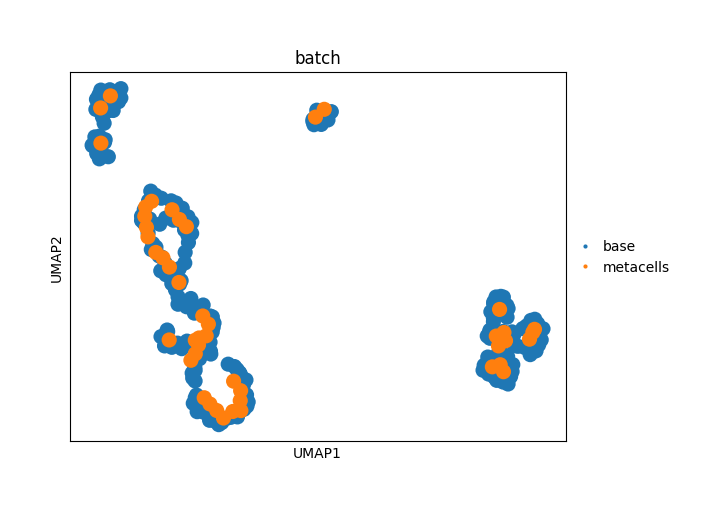

In [110]:
sc.pl.umap(all, color="batch")

In [258]:
an.compute_atac_network(atac)

Output()

Output()

Alpha coefficient calculated : 0.2051727751615398
Starting to process chromosomes : ['chr1']


Output()

Finishing to process chromosomes : ['chr1']


464232 464232
Averaging co-accessibility scores across windows...
464232 464232
933717
395925
[ 1.          1.         -0.21578303 ...  2.          2.
  2.        ]
[ 1.          1.         -0.21578303 ...  1.          1.
  1.        ]
Done !


In [112]:
net2 = atacnet.extract_atac_links(metacells)

In [127]:
net2["Peak1"] = net2["Peak1"].str.replace('_', '-')
net2["Peak2"] = net2["Peak2"].str.replace('_', '-')
net2

,Peak1,Peak2,score
72136,chr1-87042067-87042989,chr1-87044546-87045351,0.942338
73180,chr1-89035072-89035816,chr1-89036874-89037764,0.934074
73135,chr1-89033717-89034618,chr1-89035072-89035816,0.931203
109757,chr1-155091163-155092068,chr1-155255025-155255938,0.927633
72949,chr1-89005340-89006013,chr1-89035072-89035816,0.911734
...,...,...,...
15716,chr1-15016142-15016992,chr1-15328725-15329609,-0.813347
91796,chr1-116764308-116765220,chr1-117114714-117115524,-0.818476
15695,chr1-15016142-15016992,chr1-15156089-15157010,-0.819262
8378,chr1-8499656-8500521,chr1-8507009-8507895,-0.841576


In [129]:
net2.set_index(['Peak1', 'Peak2'], inplace=True)

In [130]:
res = pd.concat([res, net2], axis=1)

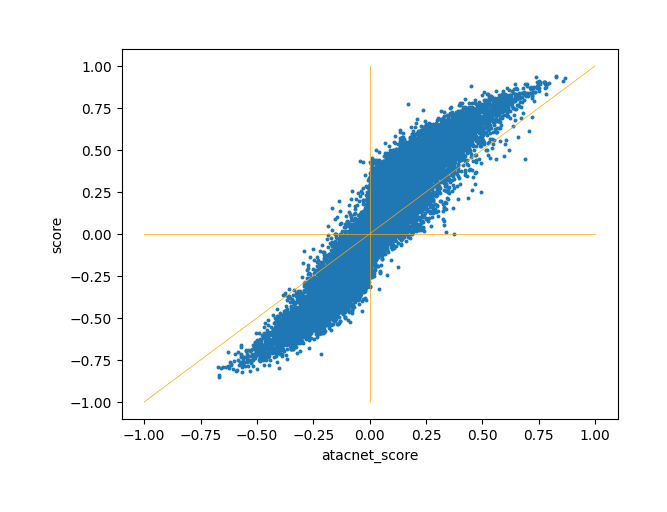

In [131]:
import matplotlib.pyplot as plt
res.plot.scatter('atacnet_score', 'score', s=8)
plt.plot([-1,1],[-1,1], color='orange')
plt.plot([0,0],[-1,1], color='orange')
plt.plot([-1,1], [0,0], color='orange')


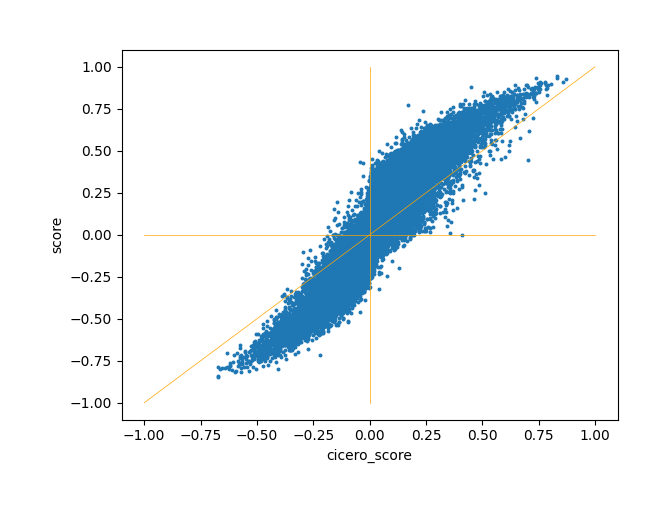

In [132]:
import matplotlib.pyplot as plt
res.plot.scatter('cicero_score', 'score', s=8)
plt.plot([-1,1],[-1,1], color='orange')
plt.plot([0,0],[-1,1], color='orange')
plt.plot([-1,1], [0,0], color='orange')


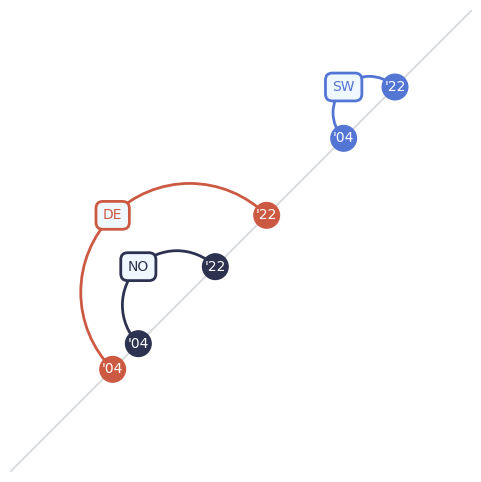

In [82]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle
from matplotlib.ticker import ScalarFormatter
import pandas as pd
import math

colors = ["#CC5A43", "#2C324F", "#5375D4"]
data = {
    "year": [2004, 2022, 2004, 2022, 2004, 2022],
    "countries": ["Denmark", "Denmark", "Norway", "Norway", "Sweden", "Sweden"],
    "sites": [4, 10, 5, 8, 13, 15]
}
df = pd.DataFrame(data)
df = df.sort_values(['year'], ascending=True).reset_index(drop=True)
df['ctry_code'] = df.countries.astype(str).str[:2].astype(str).str.upper()
df['year_lbl'] = "'" + df['year'].astype(str).str[-2:].astype(str)
sites = df.sites
lbl1 = df.year_lbl
countries = df.ctry_code

fig, ax = plt.subplots(figsize=(6, 6), sharex=True, sharey=True, facecolor="#FFFFFF", zorder=1)

ax.scatter(sites, sites, s=340, c=colors * 2, zorder=1)
ax.set_xlim(0, sites.max() + 3)
ax.set_ylim(0, sites.max() + 3)
ax.set_aspect('equal')
ax.axline([ax.get_xlim()[0], ax.get_ylim()[0]], [ax.get_xlim()[1], ax.get_ylim()[1]], zorder=0, color="#DBDEE0")

for site, l1 in zip(sites, lbl1):
    ax.annotate(l1, (site, site), color="w", va="center", ha="center")

for x1, x2, color, country in zip(sites[:len(sites) // 2], sites[len(sites) // 2:], colors, countries):
    center = (x1 + x2) / 2
    diameter = math.sqrt((x2 - x1) ** 2 + (x2 - x1) ** 2)  # Euclidian distance
    ax.add_patch(Arc((center, center), diameter, diameter, theta1=45, theta2=225,
                     edgecolor=color, facecolor='none', lw=2))
    ax.annotate(country, (x1, x2), color=color, va="center", ha="center",
                bbox=dict(boxstyle="round, pad=0.5", facecolor="aliceblue", edgecolor=color, lw=2))
ax.set_axis_off()
plt.show()

In [16]:
atac

NameError: name 'atac' is not defined

In [22]:
atac2 = atac[:, atac.var["start"]>1e7+4e4]
atac2 = atac2[:, atac2.var["end"]<1e7+2.5e5+2e4]

In [23]:
df1 = an.extract_atac_links(atac2)

/home/rtrimbou/miniconda3/envs/hummuspy/lib/python3.10/site-packages/atacnet/atacnet.py:291: ImplicitModificationWarning: Setting element `.varp['atac_network']` of view, initializing view as actual.
  anndata.varp[key] = anndata.varp[key].tocoo()


In [24]:
df = df1.copy()
df.reset_index(inplace=True)
df["Peak1_start"] = df["Peak1"].str.split('-', expand=True)[1].astype(int)
df["Peak1_end"] = df["Peak1"].str.split('-', expand=True)[2].astype(int)

df["Peak2_start"] = df["Peak2"].str.split('-', expand=True)[1].astype(int)
df["Peak2_end"] = df["Peak2"].str.split('-', expand=True)[2].astype(int)

df["score"] = df["score"]
df

,index,Peak1,Peak2,score,Peak1_start,Peak1_end,Peak2_start,Peak2_end
0,16,chr1-10074072-10074903,chr1-10203212-10204073,0.272705,10074072,10074903,10203212,10204073
1,19,chr1-10074072-10074903,chr1-10242557-10243459,0.207480,10074072,10074903,10242557,10243459
2,62,chr1-10208305-10209131,chr1-10251492-10252393,0.199846,10208305,10209131,10251492,10252393
3,20,chr1-10074072-10074903,chr1-10251492-10252393,0.199740,10074072,10074903,10251492,10252393
4,65,chr1-10242557-10243459,chr1-10251492-10252393,0.188557,10242557,10243459,10251492,10252393
...,...,...,...,...,...,...,...,...
61,37,chr1-10152641-10153548,chr1-10251492-10252393,-0.071127,10152641,10153548,10251492,10252393
62,33,chr1-10152641-10153548,chr1-10203212-10204073,-0.073822,10152641,10153548,10203212,10204073
63,44,chr1-10169925-10170711,chr1-10251492-10252393,-0.075207,10169925,10170711,10251492,10252393
64,18,chr1-10074072-10074903,chr1-10215913-10216829,-0.082631,10074072,10074903,10215913,10216829


In [202]:
threshold = 0.1
transparency_score = True
arc_params = {}
regions_params = {}

def plot_connections(
    df_connections,
    chromosome,
    start,
    end,
    abs_threshold=0.4,
    sep=(':', '-'),
    transparency_by_score = True,
    width_by_score = True,
    figsize=(20, 6),
    ax=None,
    arc_params={},
    regions_params={}
    
):
    """
    """

    df = df_connections.loc[df_connections['Peak1'].str.startswith(chromosome),:]
    df["Peak2"] = df["Peak2"].str.replace(sep[0], '-').str.replace(sep[1], '-')
    df["Peak1"] = df["Peak1"].str.replace(sep[0], '-').str.replace(sep[1], '-')

    if len(df)==0:
        raise ValueError(
            "Couldn't find connections with the parameter: chromosome={}".format(
                chromosome))

    lower_bound = df["Peak1"].str.split('-', expand=True)[2].astype(int).values
    upper_bound = df["Peak2"].str.split('-', expand=True)[1].astype(int).values
    df = df[((lower_bound >= start) & (lower_bound <= end))
            &
            ((upper_bound >= start) & (upper_bound <= end))]
    del upper_bound
    del lower_bound

    if len(df)==0:
        raise ValueError(
            "Couldn't find connections with the parameter: chromosome={}, start={}, end={}".format(
                chromosome, start, end))

    if ax==None:
        fig, ax = plt.subplots(figsize=figsize, facecolor="#FFFFFF")

    
    df["Peak1_start"] = df["Peak1"].str.split('-', expand=True)[1].astype(int)
    df["Peak1_end"] = df["Peak1"].str.split('-', expand=True)[2].astype(int)
    df["Peak2_start"] = df["Peak2"].str.split('-', expand=True)[1].astype(int)
    df["Peak2_end"] = df["Peak2"].str.split('-', expand=True)[2].astype(int)

    coordinates = df.loc[:,["Peak1_start", "Peak1_end", "Peak2_start", "Peak2_end", "score"]]

    for coordinate in coordinates.index:
        coords = coordinates.loc[coordinate, :].values
        if np.abs(coords[4]) < abs_threshold:
            continue

        center_arc = (coords[1] + coords[3] + coords[0] + coords[2])/4
        width_arc = (coords[3] + coords[2])/2  - (coords[1] + coords[0])/2
        max_height = coordinates.iloc[:,4].max()
        height_arc = np.abs(coords[4]*2)
        alpha_arc = height_arc/2/np.abs(coordinates.iloc[:,4]).max() if transparency_by_score else 1
        lw_arc = height_arc*2/coordinates.iloc[:,4].max() if width_by_score else 4
        
        color = "#4584b6" if coords[4] > 0 else "#ffde57"

        ax.add_patch(
            Arc(
                (center_arc, 0),
                width=width_arc,
                height=height_arc,
                lw=lw_arc,
                edgecolor=color,
                facecolor='none',
                theta1=0,
                theta2=180,
                alpha=alpha_arc,
                **arc_params))
    
    regions = np.unique(np.concatenate([df["Peak1"].unique(), df["Peak2"].unique()]))
    for region in regions:
        start, end = region.split('-')[1:3]
        start, end = int(start), int(end)
        ax.add_patch(
            Rectangle(
                xy=(start, -0.05),
                height=0.03,
                width=end-start,
                facecolor="#646464",
                **regions_params))


    ax.set_xlim(coordinates.iloc[:, 0].min(), coordinates.iloc[:,3].max())
    ax.set_ylim(-0.05, np.abs(coordinates.iloc[:,4]).max()*1.1)
    ax.spines[['right', 'top', 'left']].set_visible(False)

    print(np.abs(coordinates.iloc[:,4]).max()*1.1)

    x_formatter = ScalarFormatter(useOffset=True, useMathText=True)
    x_formatter.set_scientific(False)
    ax.xaxis.set_major_formatter(x_formatter)
    ax.xaxis.set_major_formatter('chr1-{x:1.0f}')
    
    ticks = [tick for tick in ax.get_yticks() if tick >=0]
    ax.set_yticks(ticks)
    ax.plot(
        [coordinates.iloc[:, 0].min(), coordinates.iloc[:, 0].min()],
        [0, ticks[-1]],
        color="black"
    )
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=20)
    #ax.set_axis_off()
    
    #plt.show()


In [203]:
atacnet = an.extract_atac_links(atac)

0.43053344273403105
0.2770422033789335


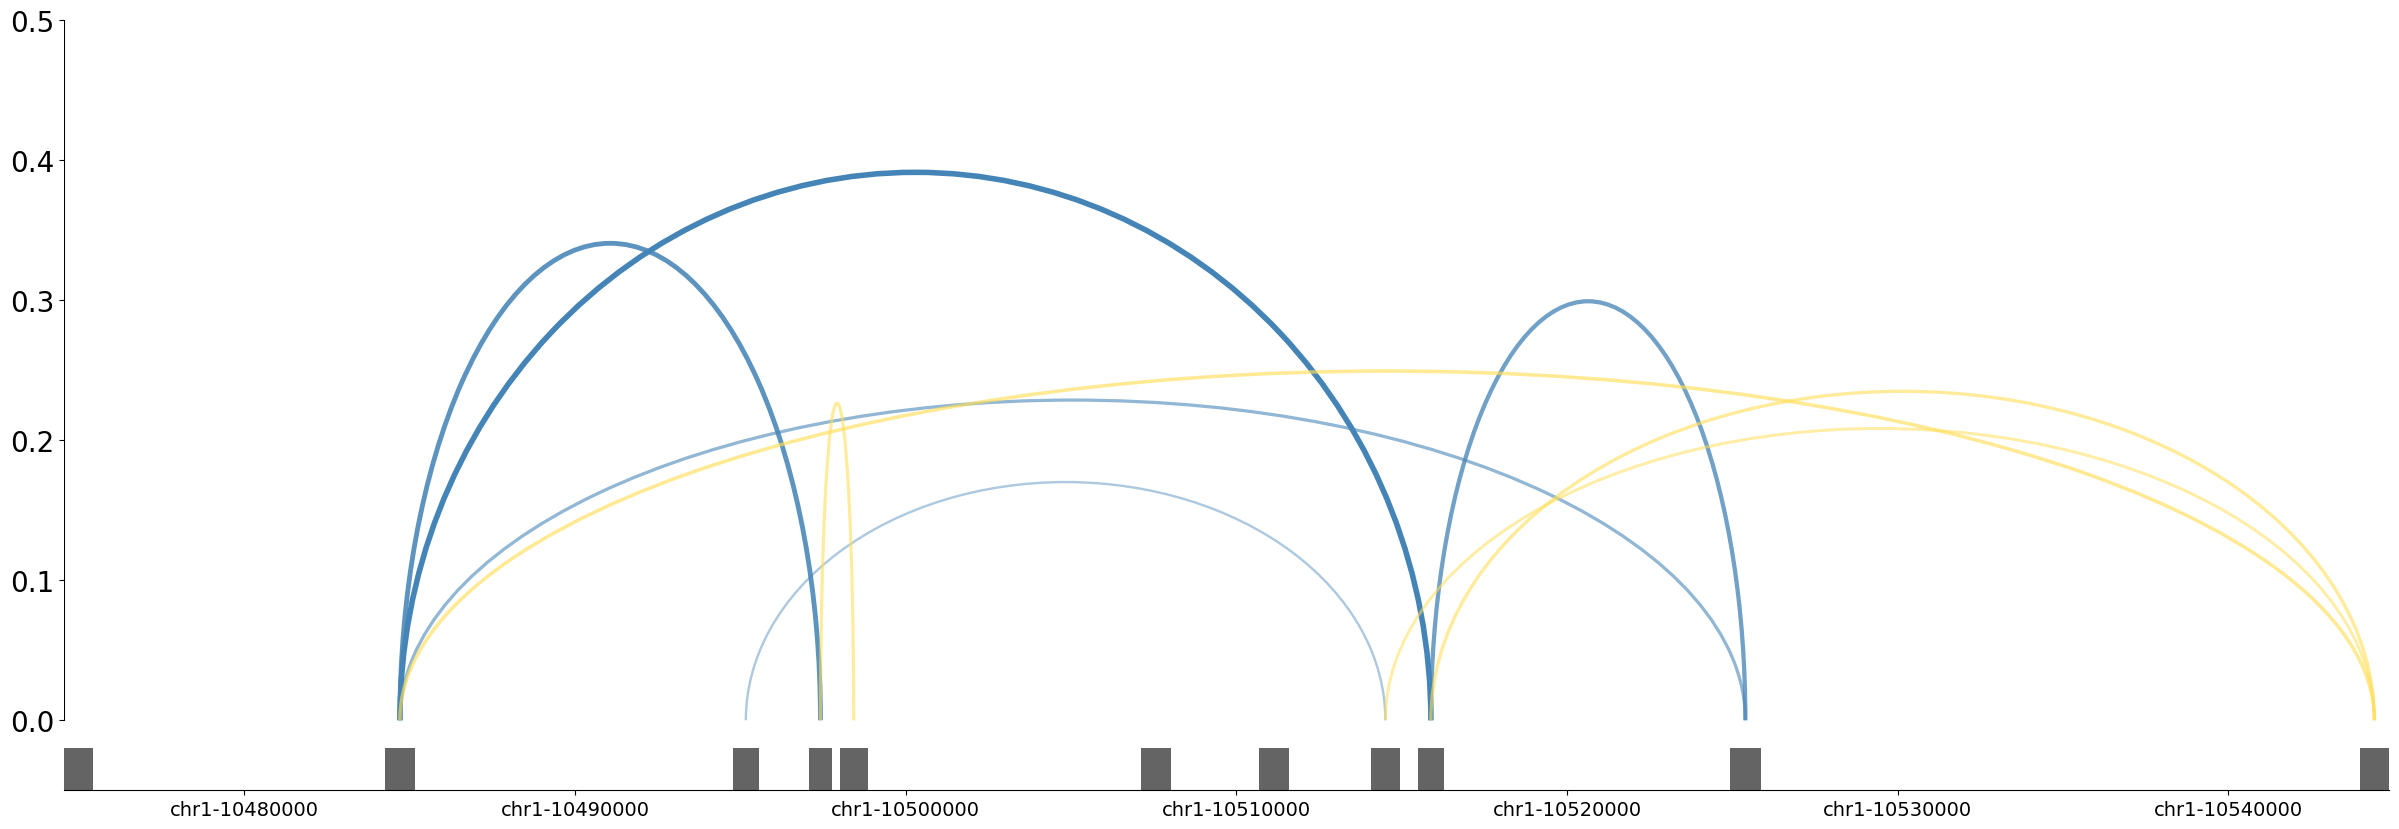

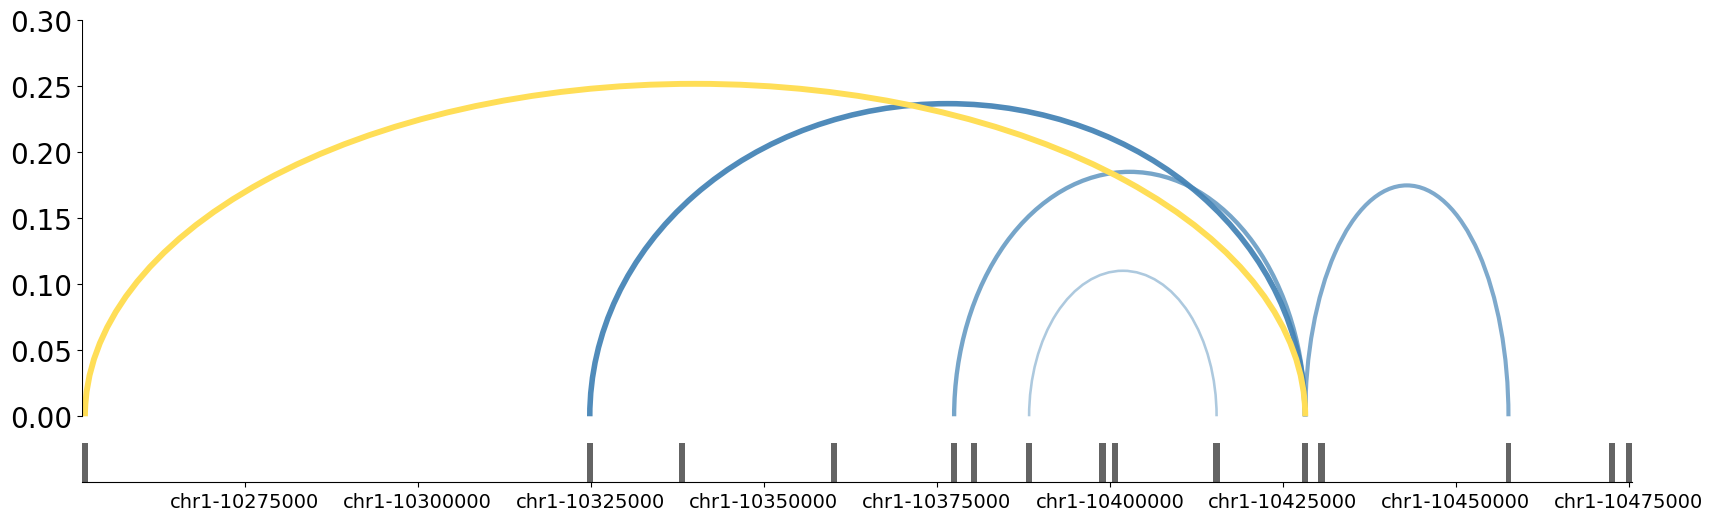

In [207]:
fig, ax = plt.subplots(1, figsize=(30,10))
plot_connections(atacnet, chromosome="chr1", start=1.0475e7, end=1.055e7, abs_threshold=0.17, ax=ax)
plot_connections(atacnet, chromosome="chr1", start=1.025e7, end=1.048e7, abs_threshold=0.1, width_by_score=True, transparency_by_score=True)

In [478]:
width_arc

39365.5

In [344]:
c = coordinates.values[0,:]

In [234]:
c[1] + c[3] - c[0] - c[2]

1818.0

In [229]:
c

array([1.55091163e+08, 1.55092068e+08, 1.55255025e+08, 1.55092068e+08,
       8.68623856e-01])

In [230]:
coordinates

,Peak1_start,Peak1_end,Peak2_start,Peak1_end,score
0,155091163,155092068,155255025,155092068,0.868624
1,89005340,89006013,89035072,89006013,0.855416
2,89035072,89035816,89036874,89035816,0.827819
3,87042067,87042989,87044546,87042989,0.826482
4,88998488,88999355,89035072,88999355,0.796973
5,15430879,15431776,15514850,15431776,0.788172
6,89404760,89405603,89407216,89405603,0.783223
7,116125969,116126786,116259319,116126786,0.782797
8,121558337,121558985,121569178,121558985,0.779142
9,40628392,40628771,40629279,40628771,0.777265


In [333]:
?Rectangle

Init signature: Rectangle(xy, width, height, *, angle=0.0, rotation_point='xy', **kwargs)
Docstring:     
A rectangle defined via an anchor point *xy* and its *width* and *height*.

The rectangle extends from ``xy[0]`` to ``xy[0] + width`` in x-direction
and from ``xy[1]`` to ``xy[1] + height`` in y-direction. ::

  :                +------------------+
  :                |                  |
  :              height               |
  :                |                  |
  :               (xy)---- width -----+

One may picture *xy* as the bottom left corner, but which corner *xy* is
actually depends on the direction of the axis and the sign of *width*
and *height*; e.g. *xy* would be the bottom right corner if the x-axis
was inverted or if *width* was negative.
Init docstring:
Parameters
----------
xy : (float, float)
    The anchor point.
width : float
    Rectangle width.
height : float
    Rectangle height.
angle : float, default: 0
    Rotation in degrees anti-clockwise about the r